In [1]:
#from __future__ import print_function
import collections
import math
import numpy as np
import os
import random
import tensorflow as tf

#import seaborn as sns
from scipy.sparse import lil_matrix
import pickle
from tfSom import SOM
from textProcessing import *
from paint import *
from utility import *

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
url = 'http://mattmahoney.net/dc/'
filename = maybe_download(url, 'text8.zip', 31344016)

Found and verified text8.zip


In [3]:
words = read_data(filename)
print('Data size %d' % len(words))
print(len(set(words)))

Data size 17005207
253854


In [4]:
vocabulary_size = 5000

data, count, dictionary, reverse_dictionary = build_dataset(words, vocabulary_size)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])
del words  # Hint to reduce memory.

('Most common words (+UNK)', [['UNK', 2735459], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)])
('Sample data', [0, 3084, 12, 6, 195, 2, 3137, 46, 59, 156])


In [5]:
print ( data[:100] )
print ( count[:100] )
for word,n in dictionary.items() : 
    print (word, n)
    break

[0, 3084, 12, 6, 195, 2, 3137, 46, 59, 156, 128, 742, 477, 0, 134, 1, 0, 2, 1, 103, 855, 3, 1, 0, 0, 2, 1, 151, 855, 3583, 1, 195, 11, 191, 59, 5, 6, 0, 215, 7, 1326, 105, 455, 20, 59, 2734, 363, 7, 3676, 1, 709, 2, 372, 27, 41, 37, 54, 541, 98, 12, 6, 1426, 2760, 19, 568, 687, 0, 1, 248, 0, 11, 1053, 28, 1, 321, 249, 0, 2880, 793, 187, 0, 12, 6, 201, 603, 11, 1, 1136, 20, 2623, 26, 0, 3, 280, 32, 4154, 142, 60, 26, 0]
[['UNK', 2735459], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764), ('in', 372201), ('a', 325873), ('to', 316376), ('zero', 264975), ('nine', 250430), ('two', 192644), ('is', 183153), ('as', 131815), ('eight', 125285), ('for', 118445), ('s', 116710), ('five', 115789), ('three', 114775), ('was', 112807), ('by', 111831), ('that', 109510), ('four', 108182), ('six', 102145), ('seven', 99683), ('with', 95603), ('on', 91250), ('are', 76527), ('it', 73334), ('from', 72871), ('or', 68945), ('his', 62603), ('an', 61925), ('be', 61281), ('this', 58832), ('which'

In [6]:
window_size = 2
train_data = build_contexts(window_size, data, dictionary)


5000 17005202


In [7]:
print len(train_data)
print train_data[:100]

10306693
[(1, 2031, 54, 41), (3762, 2190, 79), (1537, 18, 175), (24, 289, 325), (1841, 2524), (312, 241), (8, 1001, 537), (33, 3, 862, 439), (2057, 5, 142, 3497), (1, 778, 2), (2072, 48, 1462), (26, 3, 4771), (1584, 1385, 3243, 29), (56, 18, 1317, 551), (3, 1050, 51, 842), (1, 106, 1869, 261), (3795, 4, 15), (49, 3, 37, 821), (25, 795, 5), (3, 4691, 1484, 7), (443, 651, 726), (2774, 374, 2270, 357), (9, 13, 14, 758), (440, 41, 1242, 1692), (400, 1, 12, 744), (1, 170, 614), (2872, 2, 4668), (11, 81, 3123), (504, 1957, 3119), (9, 2427, 158, 23), (1328, 1561, 874), (4054, 573, 6), (2932, 37, 103), (57, 74, 10, 1), (3459, 3956, 293, 2685), (1, 351, 37, 41), (1, 2, 407, 105), (40, 19, 1693, 38), (1001, 171, 206, 25), (178, 2, 3446), (98, 20, 229, 2806), (208, 1, 504, 2433), (11, 12, 198), (329, 1011, 4, 5), (24, 1, 266, 192), (80, 1372, 868, 45), (10, 75, 284, 23), (4908, 3725), (812, 548, 790), (2, 51, 4, 1573), (3600, 217, 19, 2484), (26, 4148, 5), (17, 14, 863), (8, 2570, 4, 21), (1368, 

In [8]:
dict_size = len(dictionary)
d = 16


som = SOM(d, d, dict_size, n_iterations = 1, batch_size=100)
som.train(train_data)


Iteration: 0


In [9]:
car = signature ('car', window_size,data, dictionary,som)
audi = signature ('ford', window_size,data, dictionary,som)
human = signature ( 'human', window_size,data, dictionary,som)
#fruit = signature ('fruit',window_size, data, dictionary,som)
#apple = signature ('apple', window_size,data, dictionary,som)

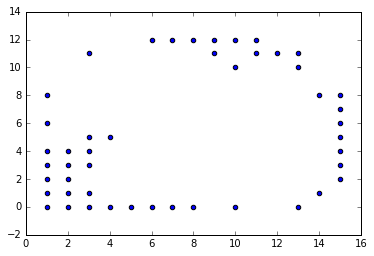

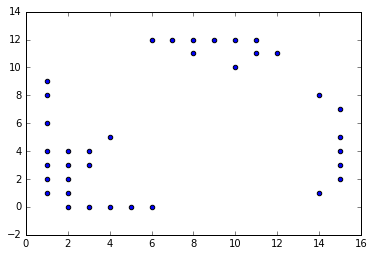

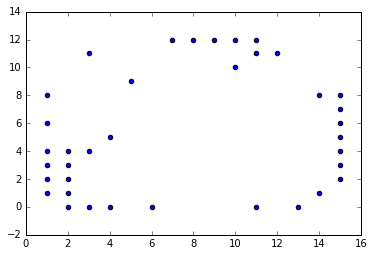

In [10]:
plot_signature(human)
plot_signature(audi)
plot_signature(car)

In [11]:
som.save("som.pkl")

som1 = SOM(d, d, dict_size)
som1.load('som.pkl')
